In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from os.path import exists

In [2]:
#Criar ou ler endereço do arquivo a usar
fileAddress ="naive_bayes_simple_files_address.txt"
if exists(fileAddress):
    with open(fileAddress,'r') as text_file:
        Addrs = text_file.readlines()
    text_file.close()
else:
    Addr1 = "C:\\Users\\hvurq\\Documents\\Data Science\\FormacaoCD\\todos os arquivos\\31.Prática em Python\\dados\\Credit.csv"
    Addr2 = "C:\\Users\\hvurq\\Documents\\Data Science\\FormacaoCD\\todos os arquivos\\31.Prática em Python\\dados\\Credit2.csv"
    Addr3 = "C:\\Users\\hvurq\\Documents\\Data Science\\FormacaoCD\\todos os arquivos\\31.Prática em Python\\dados\\iris.csv"
    Addr4 = "C:\\Users\\hvurq\\Documents\\Data Science\\FormacaoCD\\todos os arquivos\\31.Prática em Python\\dados\\NovoCredit.csv"
    Addrs = (Addr1,Addr2,Addr3,Addr4)
    with open(fileAddress,'w') as text_file:
        for addr in Addrs:
            text_file.write(addr+'\n')
    text_file.close()

In [3]:
base = pd.read_csv(Addrs[0].replace('\\',"/").replace('\n',''))
base.shape

(1000, 21)

In [4]:
base.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [5]:
base.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
base.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [7]:
#Matriz de previsores
previsores = base.iloc[:,0:20].values
class_ = base.iloc[:,20].values

In [8]:
#Encoding table values
indexes = [0,2,3,5,6,8,9,11,13,14,16,18,19]
labelEncoders=[]
for index in indexes:
    labelEncoders.append(LabelEncoder())
    previsores[:,index]=labelEncoders[-1].fit_transform(previsores[:,index])

In [9]:
previsores[0:5,:]

array([[2, 6, 1, 7, 1169, 0, 3, 4, 3, 2, 4, 2, 67, 1, 1, 2, 3, 1, 1, 1],
       [1, 48, 3, 7, 5951, 3, 0, 2, 0, 2, 2, 2, 22, 1, 1, 1, 3, 1, 0, 1],
       [0, 12, 1, 4, 2096, 3, 1, 2, 3, 2, 3, 2, 49, 1, 1, 1, 2, 2, 0, 1],
       [2, 42, 3, 5, 7882, 3, 1, 2, 3, 1, 4, 0, 45, 1, 0, 1, 3, 2, 0, 1],
       [2, 24, 2, 1, 4870, 3, 0, 3, 3, 2, 4, 1, 53, 1, 0, 2, 3, 2, 0, 1]],
      dtype=object)

In [10]:
#dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(previsores,class_,test_size=0.3,random_state=0)

In [11]:
#Training with naive Bayes
naive_Bayes = GaussianNB()
naive_Bayes.fit(X_train,y_train)

GaussianNB()

In [12]:
#Predictions of the model
predictions = naive_Bayes.predict(X_test)
predictions

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [13]:
y_test

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'bad', 'good', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'goo

In [72]:
#Gerando a matrix de confusão
confution = confusion_matrix(y_test,predictions)
confution

array([[ 41,  45],
       [ 42, 172]], dtype=int64)

In [73]:
#Calculo da atxa de acerto
fitness=accuracy_score(y_test,predictions)
badness = 1-fitness
print(f"Accuracy score: {fitness*100:.1f}%")

Accuracy score: 71.0%


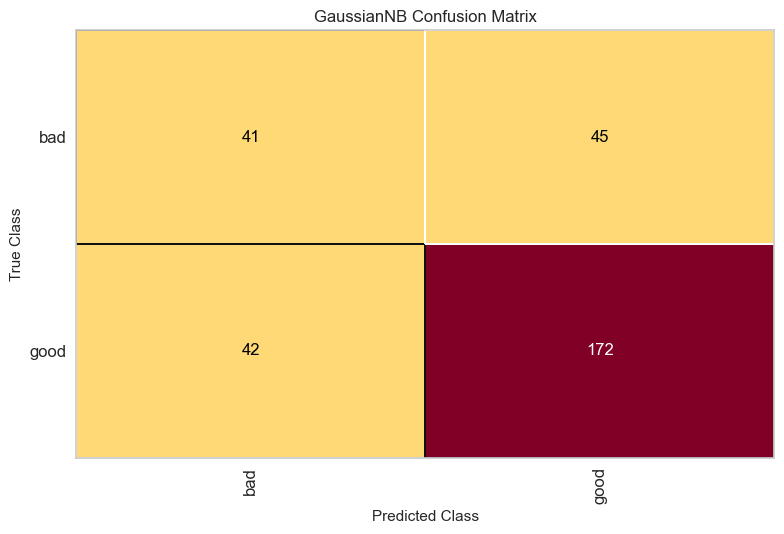

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [74]:
#Visualizando a matriz de confusão
visual_matrix = ConfusionMatrix(GaussianNB())
visual_matrix.fit(X_train,y_train)
visual_matrix.score(X_test,y_test)
visual_matrix.poof()

In [75]:
base_new = pd.read_csv(Addrs[3].replace('\\',"/").replace('\n',''))
base_new.shape

(1, 20)

In [ ]:

base_new = base_new.iloc[:,0:20].values
counter=0
for index in indexes:
    base_new[:,index]=labelEncoders[counter].transform(base_new[:,index])
    counter+=1

In [88]:
print("Prediction =",naive_Bayes.predict(base_new),sep="             ")
print("Classes =",naive_Bayes.classes_,sep="             ")
print("Probabilities = ",naive_Bayes.predict_proba(base_new)[0],sep=" ")

Prediction =             ['good']
Classes =             ['bad' 'good']
Probabilities =  [0.05390709 0.94609291]


array(['bad', 'good'], dtype='<U4')